# El CRTBP en el formalismo Hamiltoniano

In [56]:
from numpy import *
from scipy.optimize import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib nbagg
DEG=pi/180

# Ecuaciones de Movimiento

In [77]:
# Ecuaciones de Movimiento convencionales
def eom(q,t,mu):
    r1=array([-mu,0,0])
    r2=array([1-mu,0,0])
    omega=array([0,0,1])
    
    r=q[:3]
    v=q[3:]
    
    R1=r-r1
    R2=r-r2
    
    drdt=v
    dvdt=-(1-mu)/norm(R1)**3*R1-mu/norm(R2)**3*R2-cross(omega,cross(omega,r))-2*cross(omega,v)
    
    dqdt=drdt.tolist()+dvdt.tolist()
    
    return dqdt

# Ecuaciones Canónicas para el problema
def eomCanonicas(q,t,mu):
    r1=array([-mu,0,0])
    r2=array([1-mu,0,0])
    
    r=q[:3]
    p=q[3:]
    
    R1=r-r1
    R2=r-r2
    
    dxdt=r[1]+p[0]
    dydt=-r[0]+p[1]
    dzdt=p[2]
    
    dpxdt=+p[1]-(1-mu)/norm(R1)**3*(r[0]-R1[0])-mu/norm(R2)**3*(r[0]-R2[0])
    dpydt=-p[0]-(1-mu)/norm(R1)**3*r[1]-mu/norm(R2)**3*r[1]
    dpzdt=-(1-mu)/norm(R1)**3*r[2]-mu/norm(R2)**3*r[2]
    
    dqdt=[dxdt,dydt,dzdt,dpxdt,dpydt,dpzdt]
    
    return dqdt

def JacobiConstant(r,v,mu):
    r1=array([-mu,0,0])
    r2=array([1-mu,0,0])
    omega=array([0,0,1])
    
    R1=r-r1
    R2=r-r2
    
    C=norm(v)**2-2*(1-mu)/norm(R1)-2*mu/norm(R2)-(r[0]**2+r[1]**2)
    return C

# Condiciones Iniciales

In [78]:
mu=0.1
r=array([0,0,0])
v=array([0.4,3.83,0])

#Jacobi Constant
C=JacobiConstant(r,v,mu)
print "Jacobi Constant:",C

#Pseudo potential
x=linspace(-3,3,100)
y=linspace(-3,3,100)
X,Y=meshgrid(x,y)
V=(-2*(1-mu)/sqrt((X+mu)**2+Y**2)-2*mu/sqrt((X-(1-mu))**2+Y**2)-(X**2+Y**2)-C)/2

Jacobi Constant: -3.39332222222


# Solución

In [79]:
Nt=1000
ts=linspace(0,30.0,1000)
q=r.tolist()+v.tolist()

# Solución tradicional
solution=odeint(eom,q,ts,args=(mu,))
rs=solution[:,:3]
vs=solution[:,3:]

# Solución ecuaciones canónicas
solution=odeint(eomCanonicas,q,ts,args=(mu,))
rsH=solution[:,:3]
psH=solution[:,3:]

# Trayectoria y curvas de cero velocidad

<IPython.core.display.Javascript object>


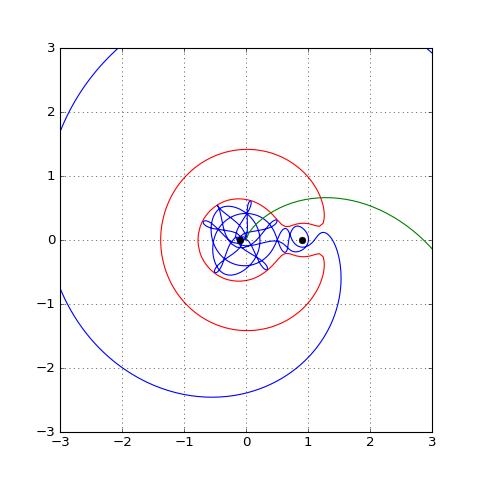

In [80]:
fig=plt.figure(figsize=(6,6))
ax=fig.gca()

ax.plot(rs[:,0],rs[:,1])

ax.plot(rsH[:,0],rsH[:,1])

ax.plot([-mu],[0],'ko')
ax.plot([1-mu],[0],'ko')
ax.contour(X,Y,V,levels=[0,],colors=['r'])

max=3
ax.set_xlim((-max,max))
ax.set_ylim((-max,max))
ax.grid()

# Constante de Jacobi

<IPython.core.display.Javascript object>


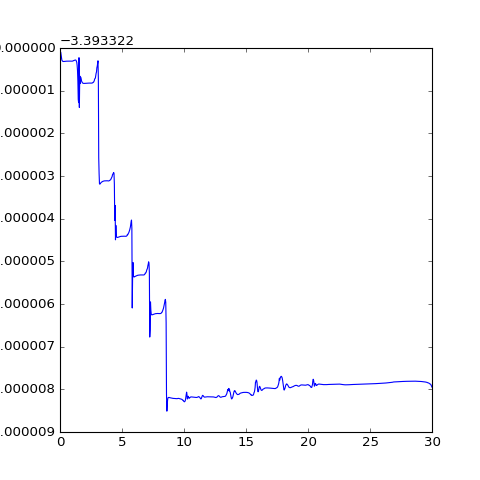

In [14]:
# Cálculo de la Constante de Jacobi
C=[JacobiConstant(rs[i,:],vs[i,:],mu) for i in xrange(Nt)]

fig=plt.figure(figsize=(6,6))
ax=fig.gca()

ax.plot(ts,C)